In [390]:
import pandas as pd
from matplotlib import pyplot as plt

In [391]:
police = pd.read_csv('Police.csv')

In [392]:
police.head()

,stop_date,stop_time,country_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,1/2/2005,1:55,NaN,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,1/18/2005,8:15,NaN,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
2,1/23/2005,23:15,NaN,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
3,2/20/2005,17:15,NaN,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False
4,3/14/2005,10:00,NaN,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


In [393]:
police.isnull().sum()

stop_date                 0
stop_time                 0
country_name          65535
driver_gender          4061
driver_age_raw         4054
driver_age             4307
driver_race            4060
violation_raw          4060
violation              4060
search_conducted          0
search_type           63056
stop_outcome           4060
is_arrested            4060
stop_duration          4060
drugs_related_stop        0
dtype: int64

In [394]:
police.drop(columns='country_name', inplace=True)

In [395]:
police.describe()

,driver_age_raw,driver_age
count,61481.000000,61228.000000
mean,1967.791106,34.148984
std,121.050106,12.760710
min,0.000000,15.000000
25%,1965.000000,23.000000
50%,1978.000000,31.000000
75%,1985.000000,43.000000
max,8801.000000,88.000000


In [396]:
police.columns

Index(['stop_date', 'stop_time', 'driver_gender', 'driver_age_raw',
       'driver_age', 'driver_race', 'violation_raw', 'violation',
       'search_conducted', 'search_type', 'stop_outcome', 'is_arrested',
       'stop_duration', 'drugs_related_stop'],
      dtype='object')

In [397]:
police[police.violation=='Speeding'].driver_gender.value_counts()

M    25517
F    11686
Name: driver_gender, dtype: int64

In [398]:
police[(police.violation=='Speeding')]['driver_gender'].value_counts()

M    25517
F    11686
Name: driver_gender, dtype: int64

In [399]:
police[police.search_conducted==True].value_counts().sum()

2477

In [400]:
police[police.search_conducted==True]['driver_gender'].value_counts()

M    2113
F     366
Name: driver_gender, dtype: int64

In [401]:
police['stop_duration'].value_counts()

0-15 Min     47379
16-30 Min    11448
30+ Min       2647
2                1
Name: stop_duration, dtype: int64

In [402]:
police['stop_duration'] = police['stop_duration'].map({'0-15 Min':7.5, '16-30 Min ':23, '30+ Min':45})

In [403]:
print(f'{police.stop_duration.mean()} minutes')

9.484218206532603 minutes


In [404]:
police.groupby('violation')['driver_age'].describe()

,count,mean,std,min,25%,50%,75%,max
violation,,,,,,,,
Equipment,6507.0,31.682957,11.380671,16.0,23.0,28.0,39.0,81.0
Moving violation,11876.0,36.736443,13.258350,15.0,25.0,35.0,47.0,86.0
Other,3477.0,40.362381,12.754423,16.0,30.0,41.0,50.0,86.0
Registration/plates,2240.0,32.656696,11.150780,16.0,24.0,30.0,40.0,74.0
Seat belt,3.0,30.333333,10.214369,23.0,24.5,26.0,34.0,42.0
Speeding,37120.0,33.262581,12.615781,15.0,23.0,30.0,42.0,88.0


# Exploratory Data Analysis

In [405]:
police.columns

Index(['stop_date', 'stop_time', 'driver_gender', 'driver_age_raw',
       'driver_age', 'driver_race', 'violation_raw', 'violation',
       'search_conducted', 'search_type', 'stop_outcome', 'is_arrested',
       'stop_duration', 'drugs_related_stop'],
      dtype='object')

In [406]:
police.head(2)

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,1/2/2005,1:55,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,7.5,False
1,1/18/2005,8:15,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,7.5,False


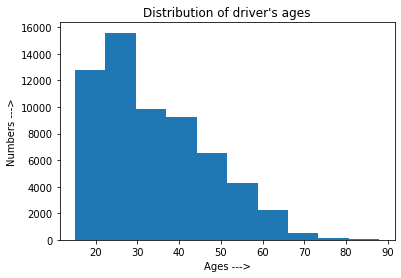

In [407]:
plt.hist(police['driver_age'])
plt.xlabel('Ages --->')
plt.ylabel('Numbers --->')
plt.title("Distribution of driver's ages")
plt.show()

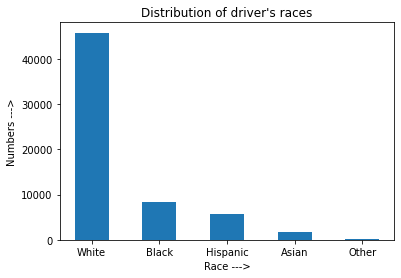

In [408]:
plt.bar(police['driver_race'].value_counts().keys(), police['driver_race'].value_counts(), width=0.5)
plt.xlabel('Race --->')
plt.ylabel('Numbers --->')
plt.title("Distribution of driver's races")
plt.show()

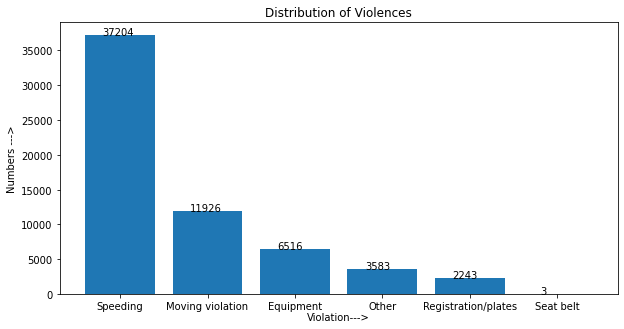

In [409]:

plt.figure(figsize=(10, 5))
plt.bar(police.violation.value_counts().keys(), police.violation.value_counts())
plt.xlabel('Violation--->', labelpad=0.8)
plt.ylabel('Numbers --->')
plt.title("Distribution of Violences")
for i in range(len(police.violation.value_counts().keys())):
    plt.text(i-0.2, police['violation'].value_counts()[i]+1, police['violation'].value_counts()[i])
plt.show()

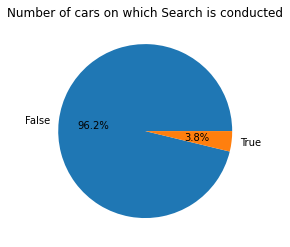

In [410]:
plt.pie(police.search_conducted.value_counts(), autopct='%.01f%%', labels=police.search_conducted.value_counts().keys())
plt.title('Number of cars on which Search is conducted')
plt.show()

In [411]:
police.stop_outcome.value_counts()

Citation            56564
Arrest Driver        2009
Warning              1889
N/D                   423
No Action             339
Arrest Passenger      251
Name: stop_outcome, dtype: int64

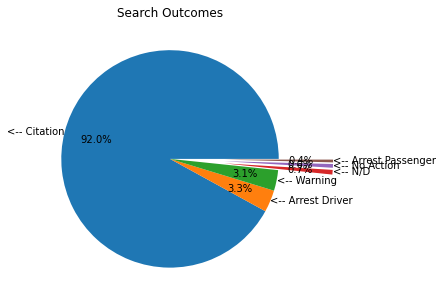

In [412]:
plt.figure(figsize=(5, 5))
plt.pie(police.stop_outcome.value_counts(), autopct='%.01f%%', explode=[0, 0, 0, 0.5, 0.5, 0.5], labels="<-- "+police.stop_outcome.value_counts().keys()\
    ,pctdistance=0.7, labeldistance=1)
plt.title('Search Outcomes')
plt.show()

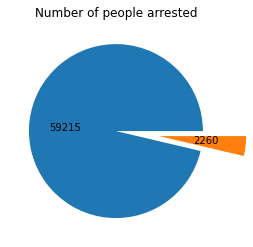

In [413]:
plt.pie(police.is_arrested.value_counts(), labels=police.is_arrested.value_counts(), explode=[0, 0.5], labeldistance=0.4)
plt.title("Number of people arrested")
plt.show()

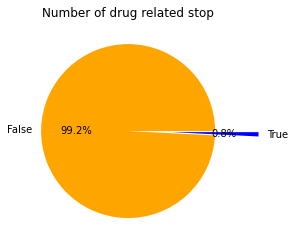

In [414]:
plt.pie(police.drugs_related_stop.value_counts(), labels=police.drugs_related_stop.value_counts().keys(), colors=['orange', 'blue']\
    , explode=[0, 0.5], autopct="%.1f%%")
plt.title('Number of drug related stop')
plt.show()

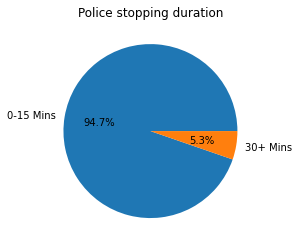

In [415]:
plt.pie(police.stop_duration.value_counts(), labels=['0-15 Mins', '30+ Mins'], autopct="%.1f%%")
plt.title("Police stopping duration")
plt.show()

In [416]:
police.groupby('violation')['driver_gender'].value_counts().unique()

array([ 5120,  1396,  9784,  2142,  3129,   454,  1611,   632,     3,
       25517, 11686], dtype=int64)

In [417]:
police.groupby('violation')['driver_gender'].value_counts()

violation            driver_gender
Equipment            M                 5120
                     F                 1396
Moving violation     M                 9784
                     F                 2142
Other                M                 3129
                     F                  454
Registration/plates  M                 1611
                     F                  632
Seat belt            M                    3
Speeding             M                25517
                     F                11686
Name: driver_gender, dtype: int64

In [418]:
lst_f = []
lst_m = []
for i in range(len(police.groupby('violation')['driver_gender'].value_counts().unique())):
    if i%2==0:
        lst_m.append(police.groupby('violation')['driver_gender'].value_counts().unique()[i])
    else:
        lst_f.append(police.groupby('violation')['driver_gender'].value_counts().unique()[i])
lst_f.insert(4, 0)
print(lst_m)
print(lst_f)

[5120, 9784, 3129, 1611, 3, 11686]
[1396, 2142, 454, 632, 0, 25517]


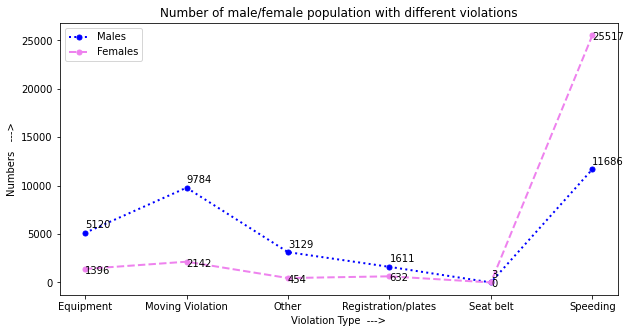

In [422]:
labels = ["Equipment", "Moving Violation", "Other", "Registration/plates", "Seat belt", "Speeding"]
plt.figure(figsize=(10, 5))
plt.plot(labels, lst_m, label='Males', color='blue', marker='.', linewidth=2, linestyle=':', markersize=10)
plt.plot(labels, lst_f, label='Females', color='violet', marker='.', linewidth=2, linestyle='--', markersize=10)
plt.xlabel("Violation Type  --->")
plt.ylabel("Numbers   --->")
plt.title("Number of male/female population with different violations")

for i in range(len(labels)):
    plt.text(labels[i], lst_m[i]+500, lst_m[i])
    plt.text(labels[i], lst_f[i]-500, lst_f[i])
plt.legend()
plt.show()

In [420]:
police.groupby('is_arrested')['driver_race'].value_counts()

is_arrested  driver_race
False        White          44428
             Black           7722
             Hispanic        5248
             Asian           1608
             Other            209
True         White           1319
             Black            545
             Hispanic         363
             Asian             31
             Other              2
Name: driver_race, dtype: int64

In [421]:
White_arr = police[(police['driver_race']=='White') & (police['is_arrested']==True)].count().unique()[0]
White_not_arr = police[(police['driver_race']=='White') & (police['is_arrested']!=True)].count().unique()[0]

Black_arr = police[(police['driver_race']=='Black') & (police['is_arrested']==True)].count().unique()[0]
Black_not_arr = police[(police['driver_race']=='Black') & (police['is_arrested']!=True)].count().unique()[0]

Hispanic_arr = police[(police['driver_race']=='Hispanic') & (police['is_arrested']==True)].count().unique()[0]
Hispanic_not_arr = police[(police['driver_race']=='Hispanic') & (police['is_arrested']!=True)].count().unique()[0]

Asian_arr = police[(police['driver_race']=='Asian') & (police['is_arrested']==True)].count().unique()[0]
Asian_not_arr = police[(police['driver_race']=='Asian') & (police['is_arrested']!=True)].count().unique()[0]

Other_arr = police[(police['driver_race']=='Other') & (police['is_arrested']==True)].count().unique()[0]
Other_not_arr = police[(police['driver_race']=='Other') & (police['is_arrested']!=True)].count().unique()[0]

per_white_arr = ((White_arr)/(White_arr+White_not_arr))*100
per_black_arr = ((Black_arr)/(Black_arr+Black_not_arr))*100
per_hispanic_arr = ((Hispanic_arr)/(Hispanic_arr+Hispanic_not_arr))*100
per_asian_arr = ((Asian_arr)/(Asian_arr+Asian_not_arr))*100
per_other_arr = ((Other_arr)/(Other_arr+Other_not_arr))*100

print(f"White people arrested: {round(per_white_arr, 2)} %")
print(f"Black people arrested: {round(per_black_arr, 2)} %")
print(f"Hispanic people arrested: {round(per_hispanic_arr, 2)} %")
print(f"Asian people arrested: {round(per_asian_arr, 2)} %")
print(f"Other people arrested: {round(per_other_arr, 2)} %")

White people arrested: 2.88 %
Black people arrested: 6.59 %
Hispanic people arrested: 6.47 %
Asian people arrested: 1.89 %
Other people arrested: 0.95 %



* BLACK PEOPLE ARE ARRESTED MORE THAN OTHER RACES